In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\Business_analytics\\BYOP\\BankChurners_final.csv")

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [2]:
### Delete non-required columns

In [3]:
df = df.drop(['CLIENTNUM','Unnamed: 21'],axis=1)

In [4]:
### Overview of data

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
### Finding mising/null values

df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
# Duplicate rows

df.duplicated().sum()

0

In [8]:
### data description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


<Axes: >

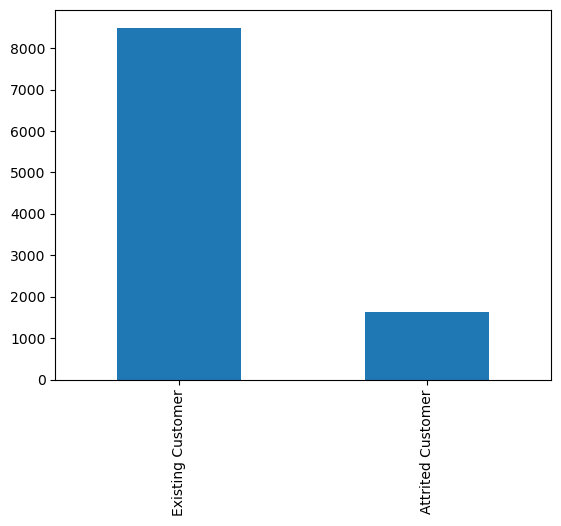

In [9]:
### Attrition flag barplot

df['Attrition_Flag'].value_counts().plot(kind='bar')

In [10]:
### Count of customers based on attrition

df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

C:\Users\Chetan\AppData\Local\Temp\ipykernel_3208\925360937.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


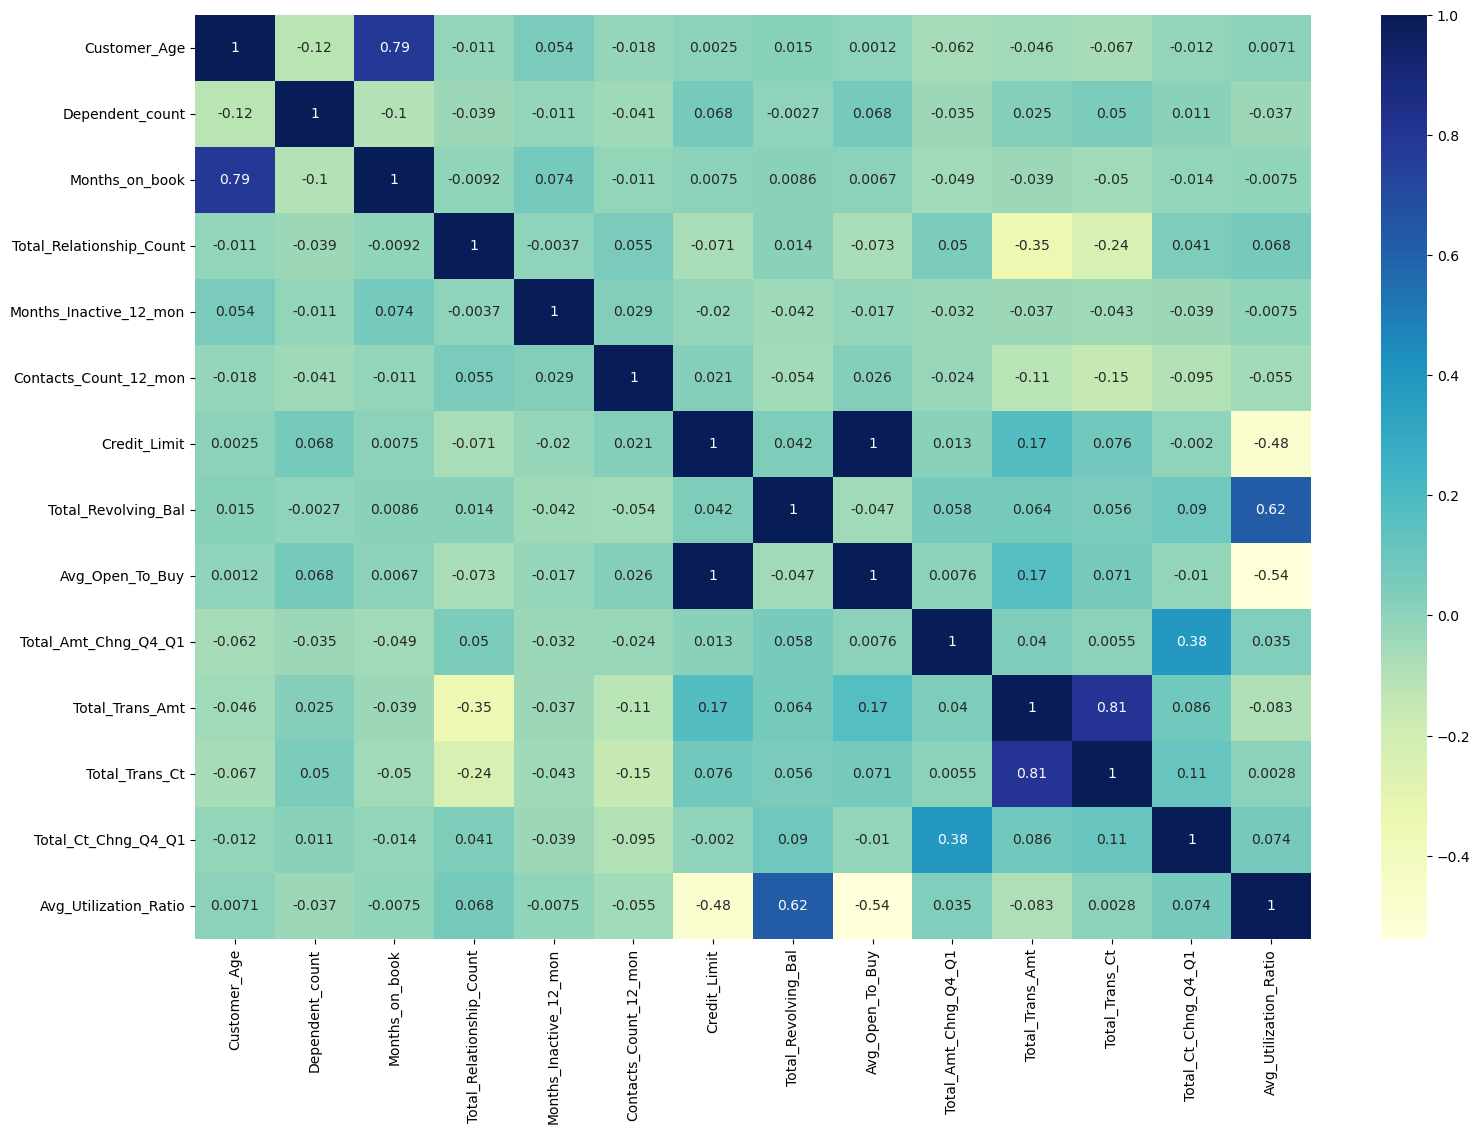

In [11]:
### Correlation among predictirs

plt.figure(figsize=(18,12))

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

In [12]:
### columns in data

df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
### Drop columns with high correlation (>0.7) with other variables

df = df.drop(['Avg_Open_To_Buy','Total_Trans_Ct','Months_on_book'],axis=1)

C:\Users\Chetan\AppData\Local\Temp\ipykernel_3208\2435960090.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


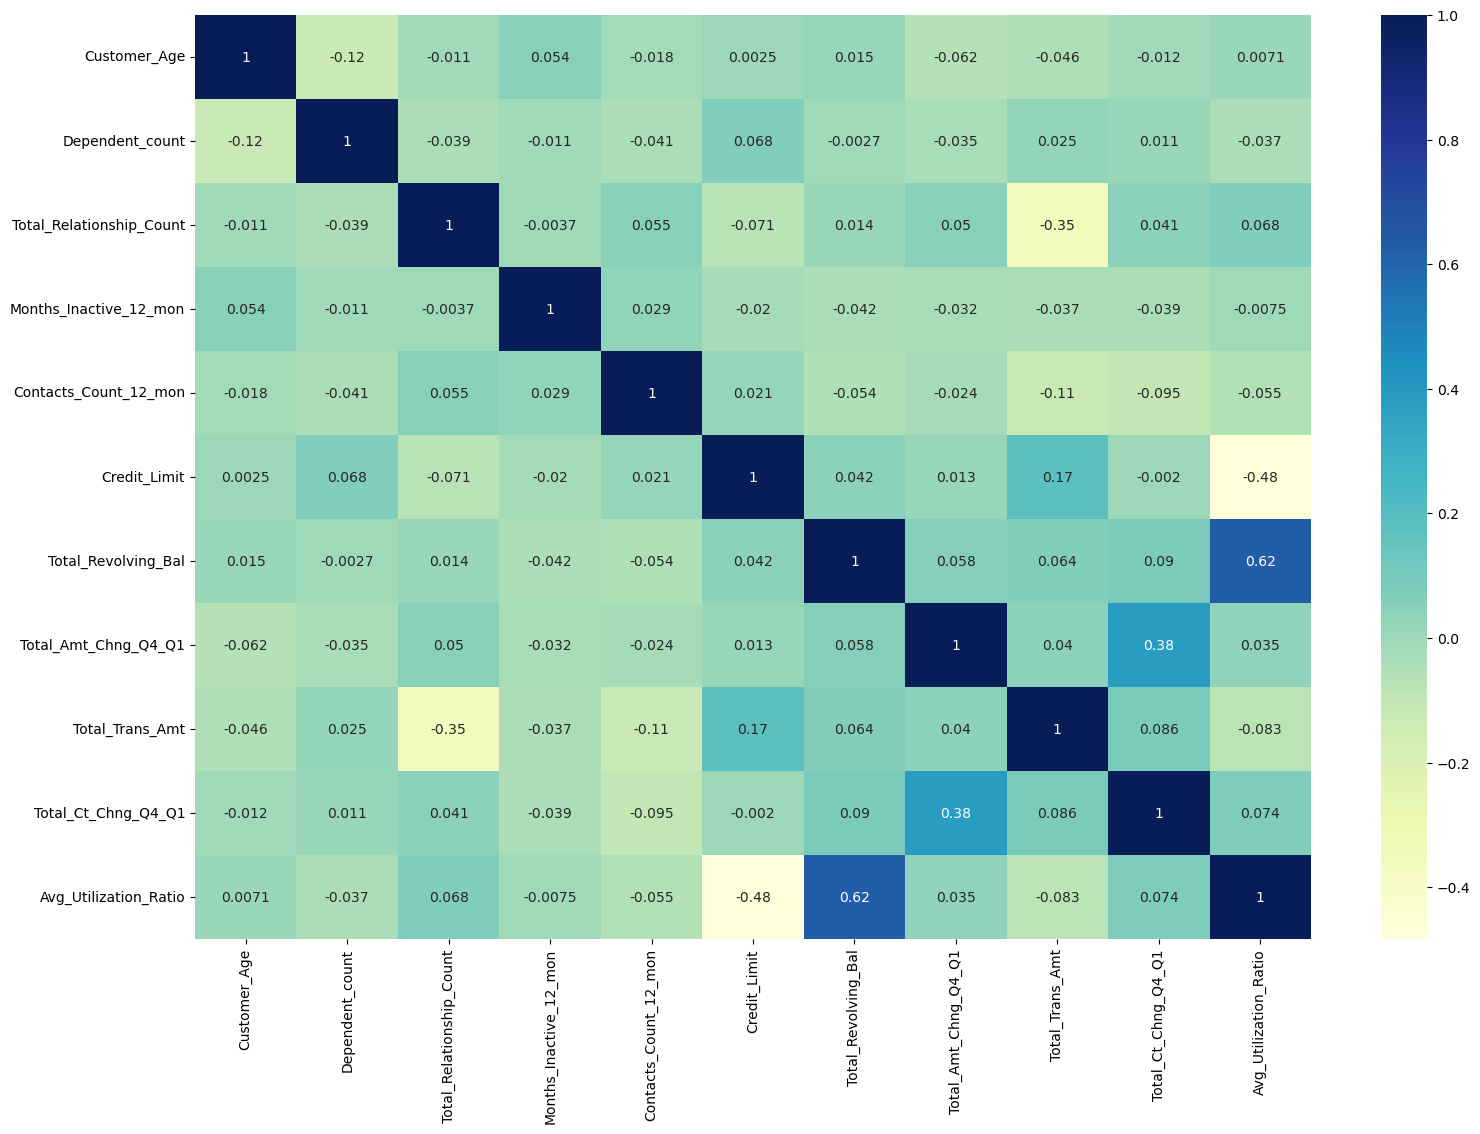

In [14]:
### Correlation matrix after droping highly corelated variables

plt.figure(figsize=(18,12))

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

In [15]:
#Understand value number of unique values in each Object column
unique_values_count = df.apply(lambda x: (x.nunique(), x.dtype))
unique_values_count

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,2,45,2,6,7,4,6,4,6,7,7,6205,1974,1158,5033,830,964
1,object,int64,object,int64,object,object,object,object,int64,int64,int64,float64,int64,float64,int64,float64,float64


In [16]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [17]:
df.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [18]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [19]:
df.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [20]:
### Finding number of unknowns in data

print(df['Education_Level'].value_counts()['Unknown'])
print(df['Marital_Status'].value_counts()['Unknown'])
print(df['Income_Category'].value_counts()['Unknown'])

1519
749
1112


In [21]:

### Hypothesis test

### Chi sq test for two categorical variables

CrosstabResult=pd.crosstab(index=df['Gender'],columns=df['Attrition_Flag'])

from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

## H0 - The 2 variables to be compared are independent.

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.00019635846717310307


In [22]:
CrosstabResult=pd.crosstab(index=df['Education_Level'],columns=df['Attrition_Flag'])

from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

## H0 - The 2 variables to be compared are independent.

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.05148913147336634


In [23]:
CrosstabResult=pd.crosstab(index=df['Marital_Status'],columns=df['Attrition_Flag'])

from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

## H0 - The 2 variables to be compared are independent.

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.10891263394840227


In [24]:
CrosstabResult=pd.crosstab(index=df['Income_Category'],columns=df['Attrition_Flag'])

from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

## H0 - The 2 variables to be compared are independent.

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.025002425704390617


In [25]:
CrosstabResult=pd.crosstab(index=df['Card_Category'],columns=df['Attrition_Flag'])

from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

## H0 - The 2 variables to be compared are independent.

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.5252382797994759


In [26]:
from scipy.stats import f_oneway

In [27]:
# Assumption(H0) is that attrition and other column are independent
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df.groupby('Attrition_Flag')['Customer_Age'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0669868850168818


In [28]:
# Assumption(H0) is that attrition and other column are independent
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df.groupby('Attrition_Flag')['Dependent_count'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.05600239253443362


In [29]:
# Assumption(H0) is that attrition and other column are independent
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df.groupby('Attrition_Flag')['Total_Relationship_Count'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  4.829281002128081e-52


In [30]:
list1 = ['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [31]:
### Using function to calculate Anova 


from scipy.stats import f_oneway

list1 = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Assumption(H0) is that attrition and other column are independent
for i in list1:
    print(i)
    
    # Grouping by 'Attrition_Flag' and extracting the numerical values
    CategoryGroupLists = [df[df['Attrition_Flag'] == group][i].values for group in df['Attrition_Flag'].unique()]
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value > 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is:', AnovaResults.pvalue)
  

Customer_Age
P-Value for Anova is: 0.0669868850168818
Dependent_count
P-Value for Anova is: 0.05600239253443362
Total_Relationship_Count
P-Value for Anova is: 4.829281002128081e-52
Months_Inactive_12_mon
P-Value for Anova is: 1.0326639995812652e-53
Contacts_Count_12_mon
P-Value for Anova is: 4.697489630696143e-96
Credit_Limit
P-Value for Anova is: 0.016285357205197453
Total_Revolving_Bal
P-Value for Anova is: 6.630148455338936e-160
Total_Amt_Chng_Q4_Q1
P-Value for Anova is: 4.836642703531849e-40
Total_Trans_Amt
P-Value for Anova is: 1.8574386556387076e-65
Total_Ct_Chng_Q4_Q1
P-Value for Anova is: 1.647724784675932e-195
Avg_Utilization_Ratio
P-Value for Anova is: 3.35768932820783e-73


In [32]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


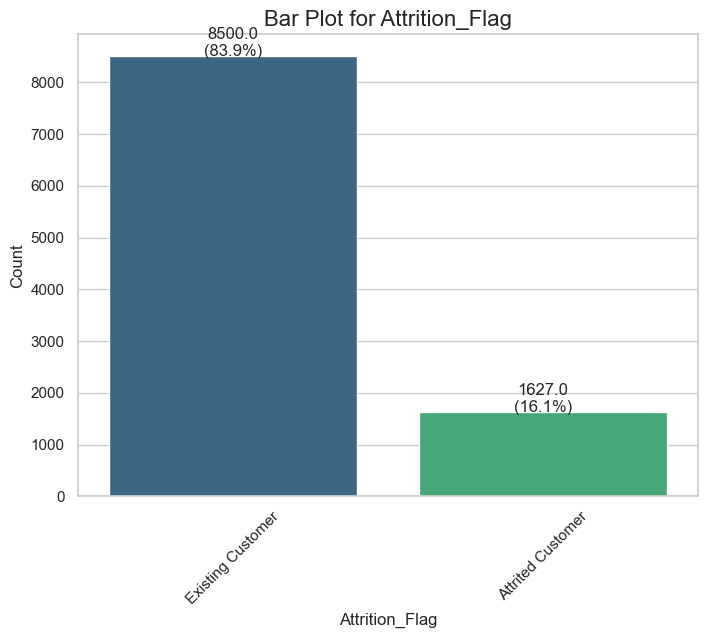

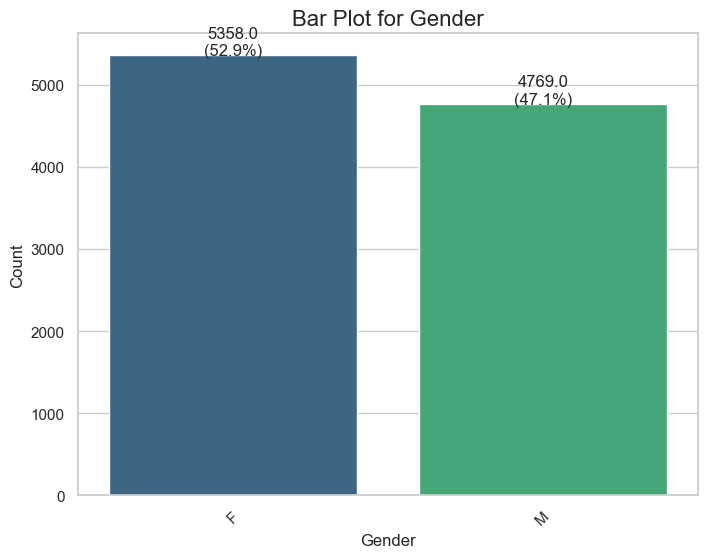

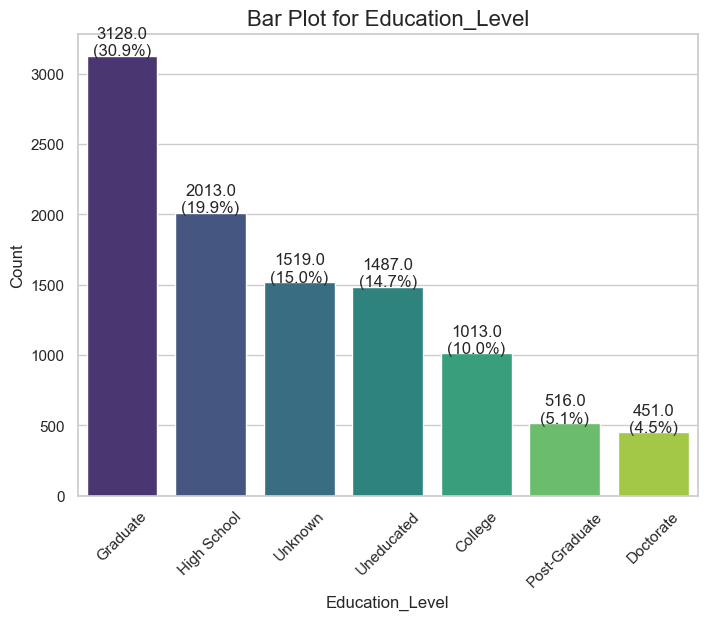

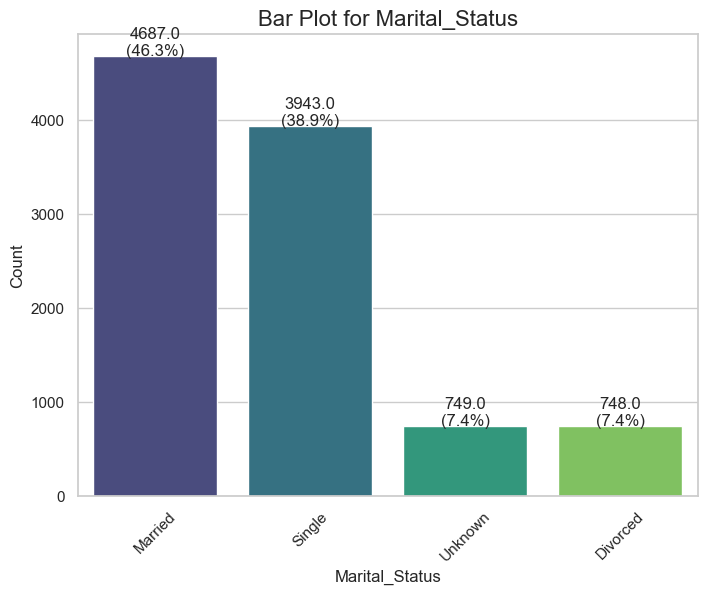

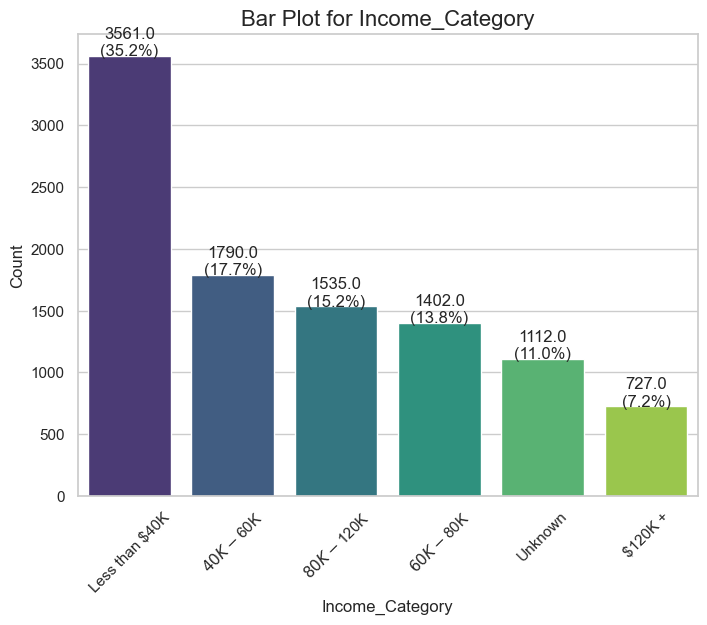

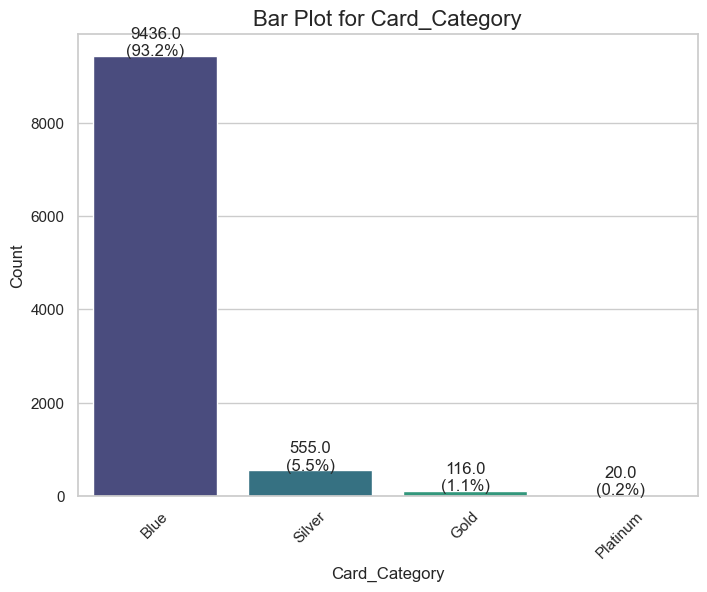

In [33]:
sns.set(style="whitegrid")

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plot bar plots for all categorical variables
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    
    # Calculate counts and sort categories
    counts = df[column].value_counts()
    categories = counts.index
    
    # Plot countplot with sorted categories
    ax = sns.countplot(x=column, data=df, order=categories, palette="viridis")
    
    # Annotate count and percentage on top of bars
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height}\n({height/total:.1%})', ha="center")

    # Set plot title
    plt.title(f'Bar Plot for {column}', fontsize=16)
    
    # Add x-axis and y-axis labels
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.savefig(f'D:\\Business_analytics\\BYOP\\{column}_bar_plot.pdf', bbox_inches='tight')
    
    plt.show()



In [34]:
### Replacing Unknown using imputing. Random forest is used to build to predict 


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with 'unknown' values
target_column = 'Marital_Status'

# Separate data into features and target
X_known = df[df[target_column] != 'Unknown'].drop(target_column, axis=1)
y_known = df[df[target_column] != 'Unknown'][target_column]



In [35]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in X_known.select_dtypes(include=['object']).columns:
    X_known[col] = label_encoder.fit_transform(X_known[col])

X_known.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,2,0,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,1,49,0,5,2,4,0,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,1,51,1,3,2,3,0,4,1,0,3418.0,0,2.594,1887,2.333,0.000
4,1,40,1,3,5,2,0,5,1,0,4716.0,0,2.175,816,2.500,0.000
5,1,44,1,2,2,1,0,3,1,2,4010.0,1247,1.376,1088,0.846,0.311


In [36]:
# Train a classification model (e.g., RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_known, y_known)




RandomForestClassifier()

In [37]:
# Encode 'unknown' data
X_unknown = df[df[target_column] == 'Unknown'].drop(target_column, axis=1)
X_unknown.head()



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,Existing Customer,40,F,4,High School,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
7,Existing Customer,32,M,0,High School,$60K - $80K,Silver,2,2,2,29081.0,1396,2.204,1538,0.714,0.048
10,Existing Customer,42,M,5,Uneducated,$120K +,Blue,5,3,2,6748.0,1467,0.831,1201,0.680,0.217
13,Existing Customer,35,M,3,Graduate,$60K - $80K,Blue,5,1,3,8547.0,1666,1.163,1311,2.000,0.195
15,Existing Customer,44,M,4,Unknown,$80K - $120K,Blue,5,1,2,4234.0,972,1.707,1348,1.700,0.230


In [38]:
  
for col in X_unknown.select_dtypes(include=['object']).columns:
    X_unknown[col] = label_encoder.fit_transform(X_unknown[col])    


In [39]:
# Predict 'unknown' values
predicted_values = model.predict(X_unknown)

# Impute predicted values back into the original DataFrame
df.loc[df[target_column] == 'Unknown', target_column] = predicted_values

<Axes: xlabel='Marital_Status', ylabel='count'>

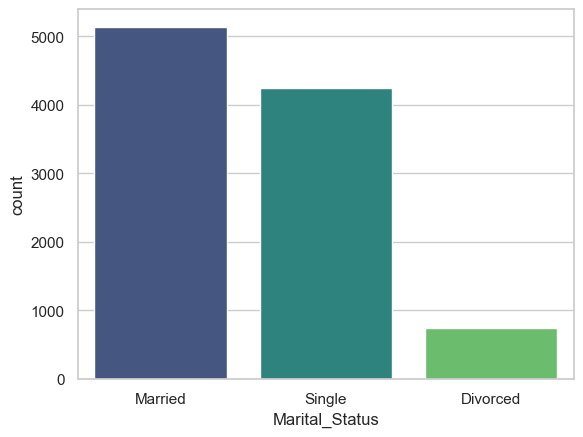

In [40]:
sns.countplot(x='Marital_Status', data=df, palette="viridis")

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with 'unknown' values
target_column = 'Education_Level'

# Separate data into features and target
X_known = df[df[target_column] != 'Unknown'].drop(target_column, axis=1)
y_known = df[df[target_column] != 'Unknown'][target_column]


# Encode categorical variables
label_encoder = LabelEncoder()
for col in X_known.select_dtypes(include=['object']).columns:
    X_known[col] = label_encoder.fit_transform(X_known[col])
    
    
# Train a classification model (e.g., RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_known, y_known)


# Encode 'unknown' data
X_unknown = df[df[target_column] == 'Unknown'].drop(target_column, axis=1)
X_unknown.head()

for col in X_unknown.select_dtypes(include=['object']).columns:
    X_unknown[col] = label_encoder.fit_transform(X_unknown[col])    

    
# Predict 'unknown' values
predicted_values = model.predict(X_unknown)

# Impute predicted values back into the original DataFrame
df.loc[df[target_column] == 'Unknown', target_column] = predicted_values    



<Axes: xlabel='Education_Level', ylabel='count'>

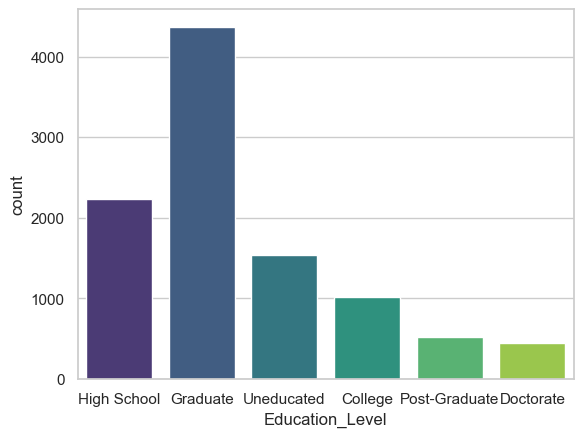

In [42]:


sns.countplot(x='Education_Level', data=df, palette="viridis")

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with 'unknown' values
target_column = 'Income_Category'

# Separate data into features and target
X_known = df[df[target_column] != 'Unknown'].drop(target_column, axis=1)
y_known = df[df[target_column] != 'Unknown'][target_column]


# Encode categorical variables
label_encoder = LabelEncoder()
for col in X_known.select_dtypes(include=['object']).columns:
    X_known[col] = label_encoder.fit_transform(X_known[col])
    
    
# Train a classification model (e.g., RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_known, y_known)


# Encode 'unknown' data
X_unknown = df[df[target_column] == 'Unknown'].drop(target_column, axis=1)
X_unknown.head()

for col in X_unknown.select_dtypes(include=['object']).columns:
    X_unknown[col] = label_encoder.fit_transform(X_unknown[col])    

    
# Predict 'unknown' values
predicted_values = model.predict(X_unknown)

# Impute predicted values back into the original DataFrame
df.loc[df[target_column] == 'Unknown', target_column] = predicted_values 

<Axes: xlabel='Income_Category', ylabel='count'>

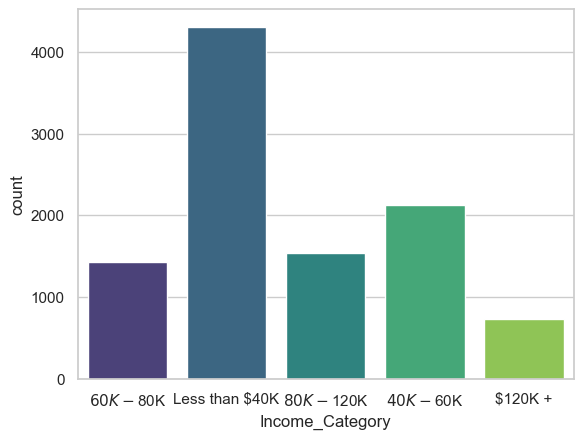

In [44]:
sns.countplot(x='Income_Category', data=df, palette="viridis")

<Axes: ylabel='Contacts_Count_12_mon'>

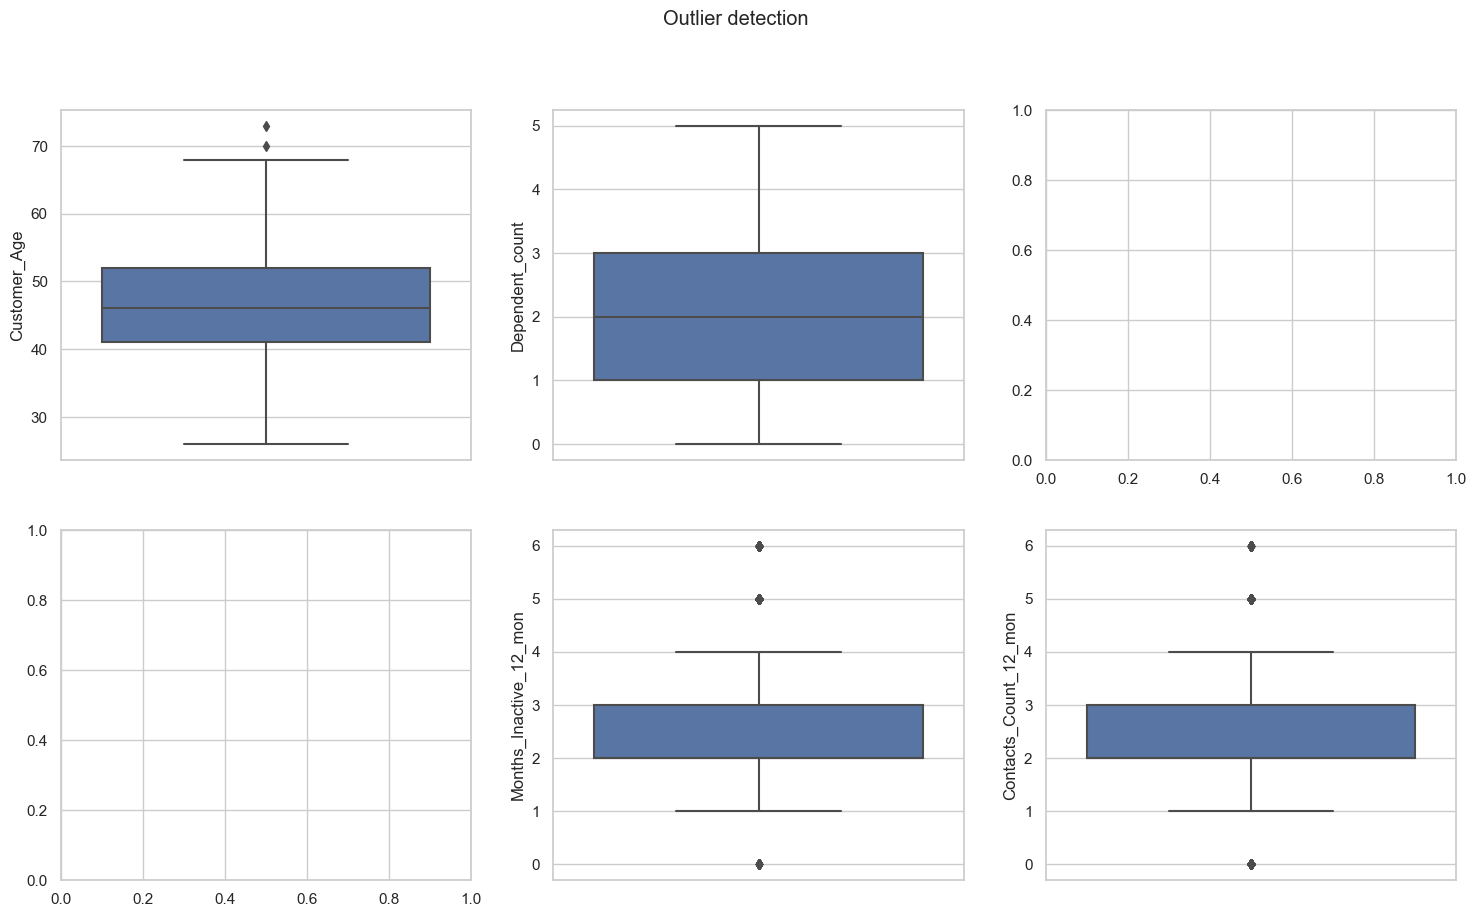

In [45]:
### Outlier detection


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Outlier detection')
 

sns.boxplot(ax=axes[0, 0], data=df,  y='Customer_Age')
sns.boxplot(ax=axes[0, 1], data=df,  y='Dependent_count')
sns.boxplot(ax=axes[1, 1], data=df,  y='Months_Inactive_12_mon')
sns.boxplot(ax=axes[1, 2], data=df,  y='Contacts_Count_12_mon')

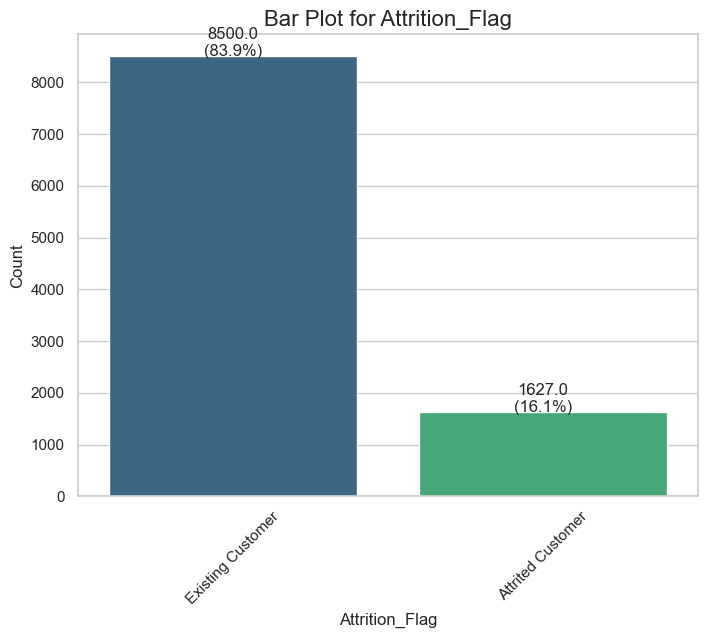

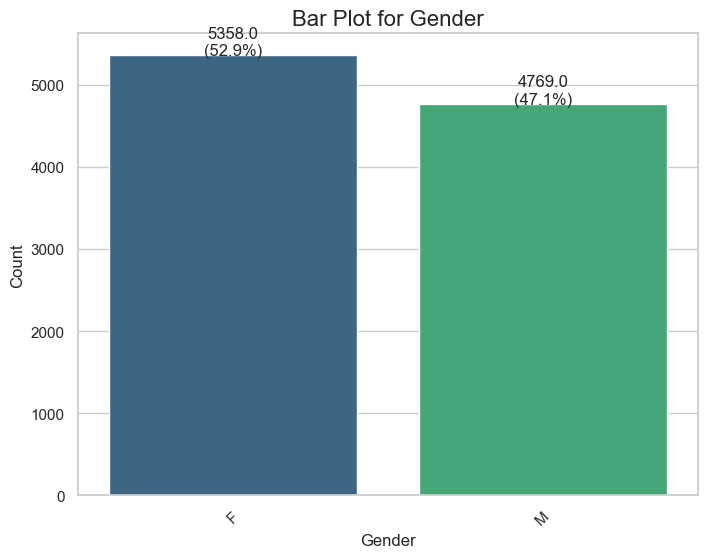

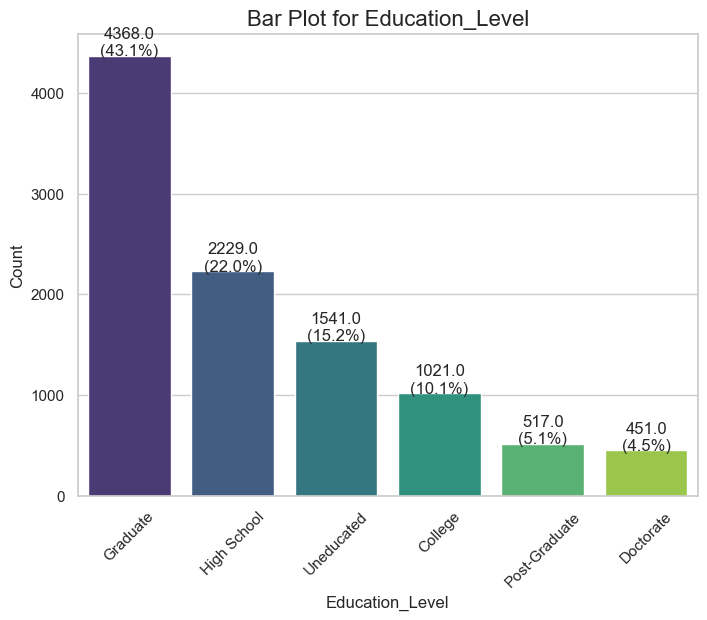

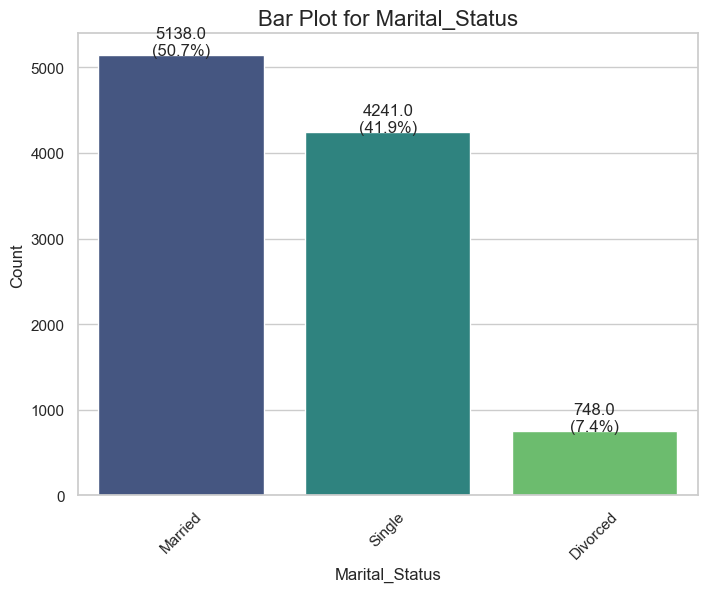

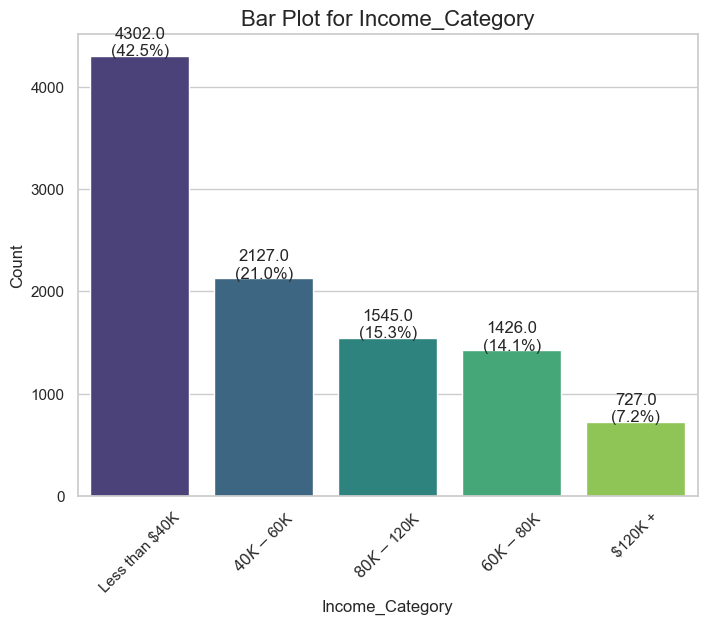

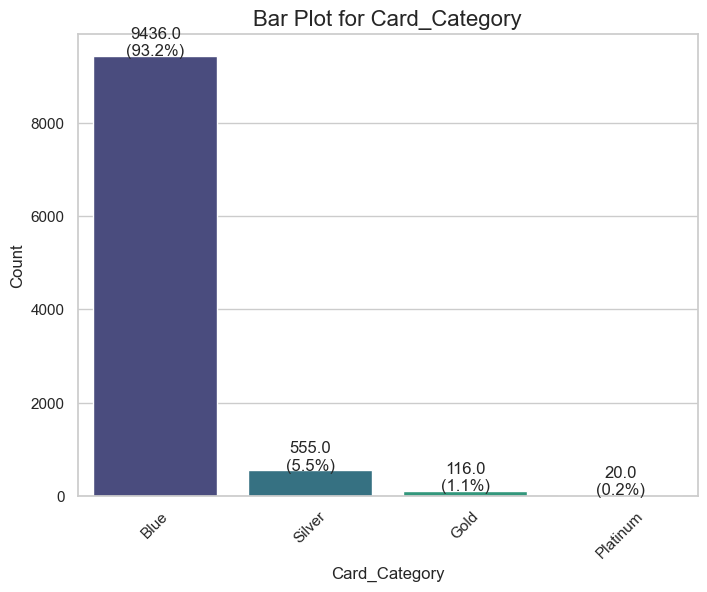

In [46]:
sns.set(style="whitegrid")

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plot bar plots for all categorical variables
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    
    # Calculate counts and sort categories
    counts = df[column].value_counts()
    categories = counts.index
    
    # Plot countplot with sorted categories
    ax = sns.countplot(x=column, data=df, order=categories, palette="viridis")
    
    # Annotate count and percentage on top of bars
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height}\n({height/total:.1%})', ha="center")

    # Set plot title
    plt.title(f'Bar Plot for {column}', fontsize=16)
    
    # Add x-axis and y-axis labels
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.savefig(f'D:\\Business_analytics\\BYOP\\{column}_bar_plot_updated.pdf', bbox_inches='tight')
    
    plt.show()



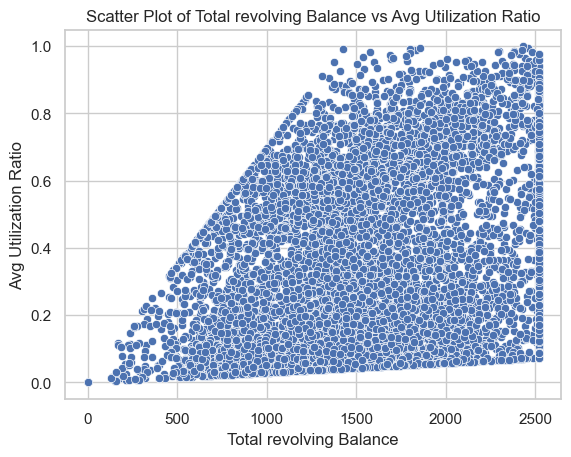

In [47]:
sns.scatterplot(x="Total_Revolving_Bal", y="Avg_Utilization_Ratio", data=df)

# Set plot title and labels
plt.title("Scatter Plot of Total revolving Balance vs Avg Utilization Ratio")
plt.xlabel("Total revolving Balance")
plt.ylabel("Avg Utilization Ratio")

# Show the plot
plt.show()

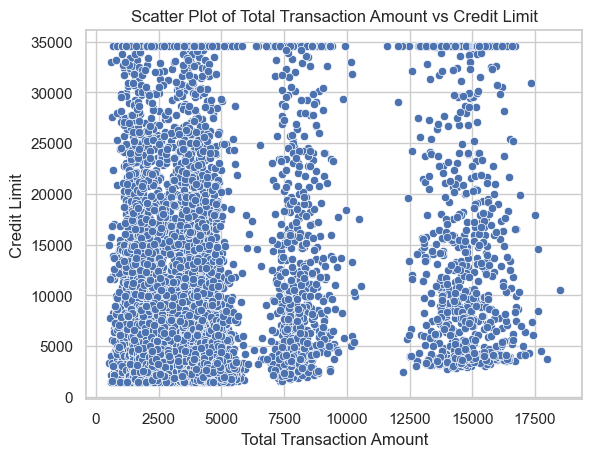

In [48]:
sns.scatterplot(x="Total_Trans_Amt", y="Credit_Limit", data=df)

# Set plot title and labels
plt.title("Scatter Plot of Total Transaction Amount vs Credit Limit")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Credit Limit")

# Show the plot
plt.show()

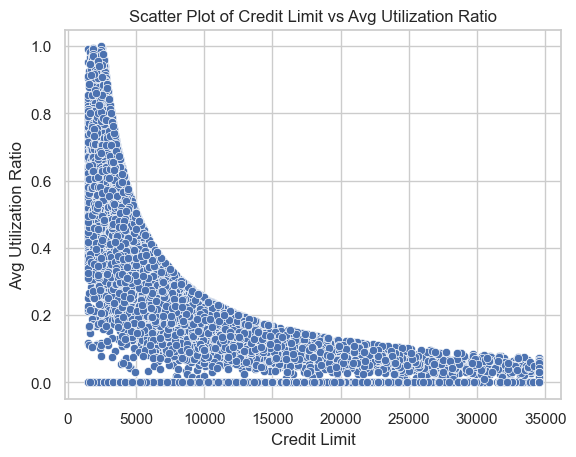

In [49]:
sns.scatterplot(x="Credit_Limit", y="Avg_Utilization_Ratio", data=df)

# Set plot title and labels
plt.title("Scatter Plot of Credit Limit vs Avg Utilization Ratio")
plt.xlabel("Credit Limit")
plt.ylabel("Avg Utilization Ratio")

# Show the plot
plt.show()

<Axes: xlabel='Customer_Age', ylabel='Count'>

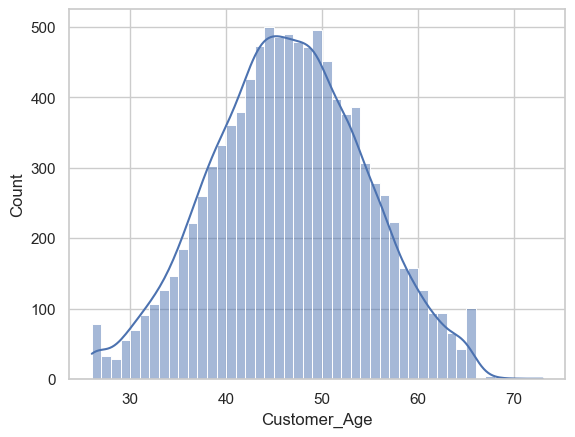

In [50]:
sns.histplot(df,x="Customer_Age",kde=True)


<Axes: xlabel='Credit_Limit', ylabel='Count'>

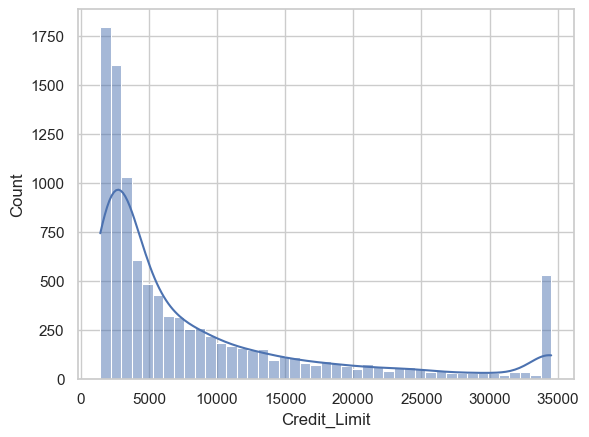

In [51]:
sns.histplot(df,x="Credit_Limit",kde=True)

In [52]:
from scipy.stats import f_oneway

list1 = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Assumption(H0) is that attrition and other column are independent
for i in list1:
    print(i)
    
    # Grouping by 'Attrition_Flag' and extracting the numerical values
    CategoryGroupLists = [df[df['Education_Level'] == group][i].values for group in df['Education_Level'].unique()]
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value > 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is:', AnovaResults.pvalue)

Customer_Age
P-Value for Anova is: 0.02117407999364897
Dependent_count
P-Value for Anova is: 0.6349921926403985
Total_Relationship_Count
P-Value for Anova is: 0.38920960057435483
Months_Inactive_12_mon
P-Value for Anova is: 0.8918208868816802
Contacts_Count_12_mon
P-Value for Anova is: 0.7115425261452717
Credit_Limit
P-Value for Anova is: 0.6004811294641923
Total_Revolving_Bal
P-Value for Anova is: 0.019870402089415526
Total_Amt_Chng_Q4_Q1
P-Value for Anova is: 0.368960354806555
Total_Trans_Amt
P-Value for Anova is: 0.4084113603797948
Total_Ct_Chng_Q4_Q1
P-Value for Anova is: 0.2961023363208176
Avg_Utilization_Ratio
P-Value for Anova is: 0.5525868426567002


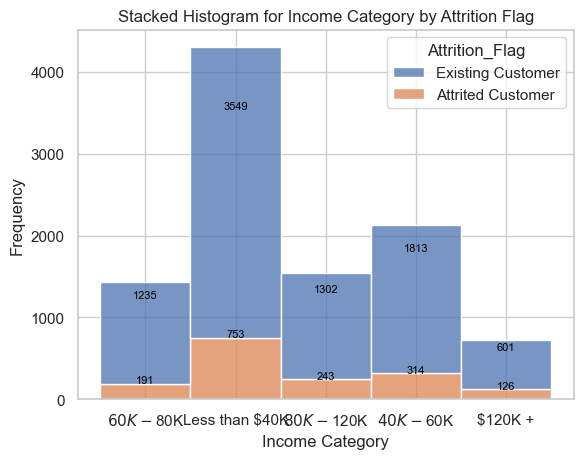

In [53]:

ax = sns.histplot(df, x="Income_Category", hue="Attrition_Flag", multiple="stack", bins=30)

# Set plot title and labels
plt.title("Stacked Histogram for Income Category by Attrition Flag")
plt.xlabel("Income Category")
plt.ylabel("Frequency")

# Add counts to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=8, color='black')

# Show the plot
plt.show()

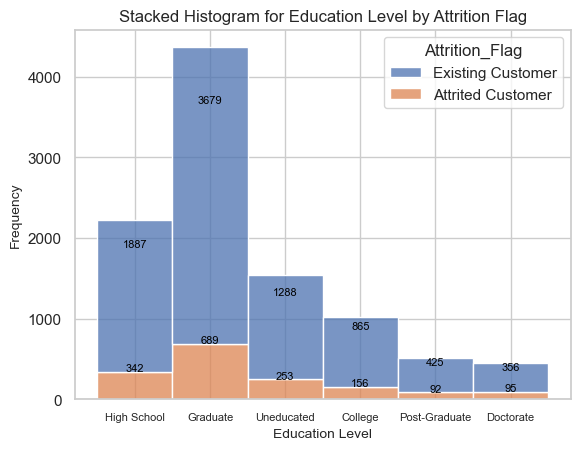

In [54]:
# Create the stacked histogram with KDE
ax = sns.histplot(df, x="Education_Level", hue="Attrition_Flag", multiple="stack", bins=30)

# Set plot title and labels with reduced font size
plt.title("Stacked Histogram for Education Level by Attrition Flag", fontsize=12)
plt.xlabel("Education Level", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Add counts to the plot with reduced font size
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=8, color='black')

# Reduce the size of the y-axis ticks
ax.tick_params(axis='x', labelsize=8)

# Show the plot
plt.show()

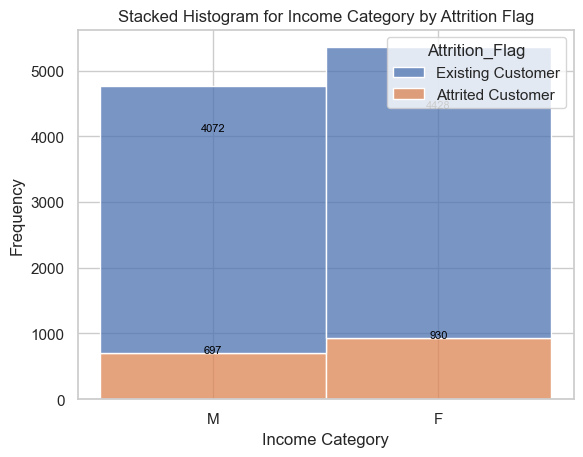

In [55]:
ax = sns.histplot(df, x="Gender", hue="Attrition_Flag", multiple="stack", bins=30)

# Set plot title and labels
plt.title("Stacked Histogram for Income Category by Attrition Flag")
plt.xlabel("Income Category")
plt.ylabel("Frequency")

# Add counts to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=8, color='black')

# Show the plot
plt.show()

<Axes: >

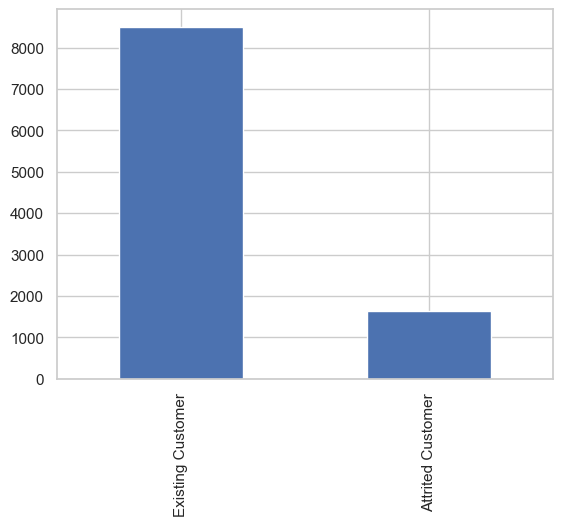

In [56]:
# Attrition flag barplot

df['Attrition_Flag'].value_counts().plot(kind='bar')

In [57]:
X = df.drop('Attrition_Flag',axis=1)
y = df['Attrition_Flag']

In [58]:
cat_df = X.select_dtypes(include=['object'])
cat_df.head()

## create dummies 

cat_df=pd.get_dummies(cat_df)
cat_df.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [59]:
X.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [60]:
num_df = X.select_dtypes(include=['int64','float64'])

In [61]:
print(X.shape)

X = pd.concat([cat_df,num_df],axis=1)
print(X.shape)

(10127, 16)
(10127, 31)


In [62]:
y.shape

(10127,)

In [63]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import RandomizedSearchCV
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
#X_train.to_csv("D:\\Business_analytics\\BYOP\\X_train.csv", index=False)

#X_test.to_csv("D:\\Business_analytics\\BYOP\\X_test.csv", index=False)

#y_train.to_csv("D:\\Business_analytics\\BYOP\\y_train.csv", index=False)

#y_test.to_csv("D:\\Business_analytics\\BYOP\\y_test.csv", index=False)


In [65]:
### with imbalanced data

In [66]:
#### Decision tree

In [67]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini',max_depth=10)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [69]:
y_dtc = dtc.predict(X_test)

<Axes: >

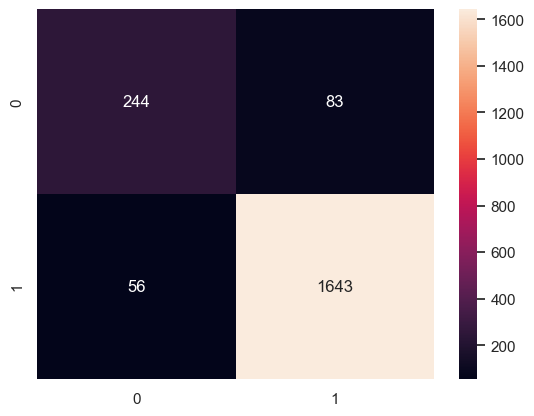

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix (y_test,y_dtc)
sns.heatmap(cm, annot = True, fmt='d')

In [71]:
print(classification_report(y_test,y_dtc))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.75      0.78       327
Existing Customer       0.95      0.97      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.88      0.86      0.87      2026
     weighted avg       0.93      0.93      0.93      2026



In [72]:
### Hyperparameter tuning for Decision tree
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param = {
        'max_depth' :randint(1,100),
        'criterion':['gini','entropy']
        }
        #'max_features' : [3,4,5]}
         #'max_features' : ['auto','sqrt','log2',None]}

dtc_rand = DecisionTreeClassifier()

#try all possible combination from param set

rand_search_dtc = RandomizedSearchCV(dtc_rand,param_distributions=param,n_iter=5,cv=5)

rand_search_dtc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E23985870>})

In [73]:
y_rand_dtc = rand_search_dtc.predict(X_test)

In [74]:
print(classification_report(y_test,y_rand_dtc))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.73      0.77       327
Existing Customer       0.95      0.97      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.88      0.85      0.86      2026
     weighted avg       0.93      0.93      0.93      2026



In [75]:
### Bagging classifier

In [76]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(oob_score=True, n_estimators=500, random_state=300, base_estimator = DecisionTreeClassifier())

In [77]:
bag.fit(X_train,y_train)

y_bag = bag.predict(X_test)

C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<Axes: >

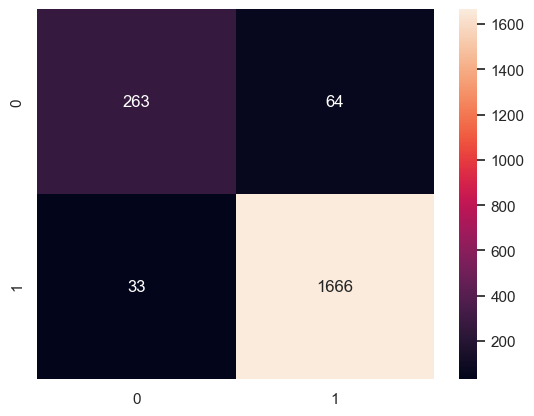

In [78]:
cm_bag = confusion_matrix (y_test,y_bag)
sns.heatmap(cm_bag, annot = True, fmt='d')

In [79]:
print(classification_report(y_test,y_bag))

                   precision    recall  f1-score   support

Attrited Customer       0.89      0.80      0.84       327
Existing Customer       0.96      0.98      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.93      0.89      0.91      2026
     weighted avg       0.95      0.95      0.95      2026



In [80]:
#param = {
#        'n_estimators': [100,200,300,400,500],
        #'max_samples': [0.5, 0.7, 0.9, 1.0],
        #'max_features': [0.5, 0.7, 0.9, 1.0],
        #'criterion':['gini','entropy']
#        }
        #'max_features' : [3,4,5]}
         #'max_features' : ['auto','sqrt','log2',None]}

#bag_rand =BaggingClassifier(oob_score=True,random_state=300, base_estimator = DecisionTreeClassifier())

#try all possible combination from param set

#rand_search_bag = RandomizedSearchCV(bag_rand,param_distributions=param,n_iter=5,cv=5)

#rand_search_bag.fit(X_train,y_train)


In [81]:

#print("Best parameters:", rand_search_bag.best_params_)

In [82]:
#y_rand_bag = rand_search_bag.predict(X_test)

#print(classification_report(y_test,y_rand_bag))

In [83]:
### Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(oob_score = True,n_estimators=500, max_depth=8,random_state=42)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, oob_score=True,
                       random_state=42)

In [86]:
y_rfc = rfc.predict(X_test)



<Axes: >

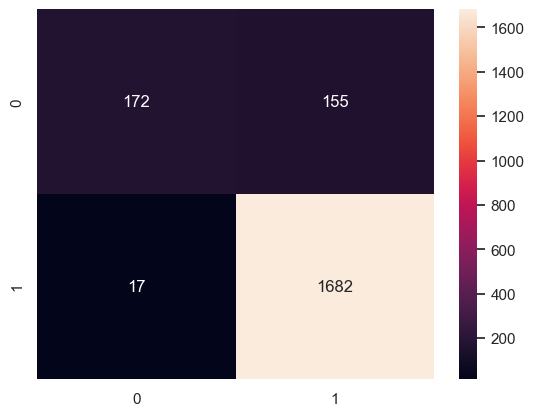

In [87]:
cm_rfc = confusion_matrix (y_test,y_rfc)
sns.heatmap(cm_rfc, annot = True, fmt='d')

In [88]:
print(classification_report(y_test,y_rfc))

                   precision    recall  f1-score   support

Attrited Customer       0.91      0.53      0.67       327
Existing Customer       0.92      0.99      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.91      0.76      0.81      2026
     weighted avg       0.91      0.92      0.91      2026



In [89]:
from scipy.stats import randint

param = {'n_estimators' : randint(50,500),
        'max_depth' : randint(1,50),
        'criterion': ['gini','entropy'],
        #'max_features' : [3,4,5]}
         'max_features' : ['auto','sqrt','log2',None]}

rf = RandomForestClassifier()

#try all possible combination from param set

rand_search_rfc = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,cv=5,random_state=42)

rand_search_rfc.fit(X_train,y_train)

C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E26E062C0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E313B45E0>},
                   random_state=42)

In [90]:
print("Best parameters:", rand_search_rfc.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 36, 'max_features': None, 'n_estimators': 201}


In [91]:
y_rand_rfc = rand_search_rfc.predict(X_test)

In [92]:
print(classification_report(y_test,y_rand_rfc))

                   precision    recall  f1-score   support

Attrited Customer       0.89      0.80      0.84       327
Existing Customer       0.96      0.98      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.92      0.89      0.91      2026
     weighted avg       0.95      0.95      0.95      2026



In [93]:
#### Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

<Axes: >

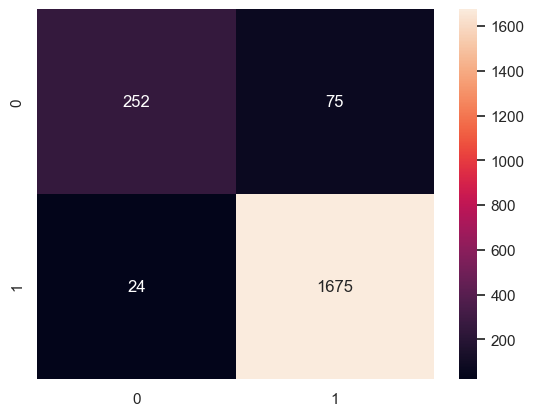

In [95]:

y_gb = gb.predict(X_test)

cm = confusion_matrix (y_test,y_gb)
sns.heatmap(cm, annot = True, fmt='d')

In [96]:
print(classification_report(y_test,y_gb))

                   precision    recall  f1-score   support

Attrited Customer       0.91      0.77      0.84       327
Existing Customer       0.96      0.99      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.94      0.88      0.90      2026
     weighted avg       0.95      0.95      0.95      2026



In [97]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param = {'n_estimators' : range(20,81,10),
        'max_depth' :randint(1,20),
         'max_depth':range(5,16,2), 
         'min_samples_split':range(200,1001,200),
         #'learning_rate': [1.5]
        #'criterion':['gini','entropy']
         'max_features' : ['sqrt','log2']
        }
        #'max_features' : [3,4,5]}
         

gbr = GradientBoostingClassifier(learning_rate=0.1, random_state=42)

#try all possible combination from param set

rand_search_gbr = RandomizedSearchCV(gbr,param_distributions=param,n_iter=5,cv=5)

rand_search_gbr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': range(200, 1001, 200),
                                        'n_estimators': range(20, 81, 10)})

In [98]:
y_rand_gbr = rand_search_gbr.predict(X_test)

<Axes: >

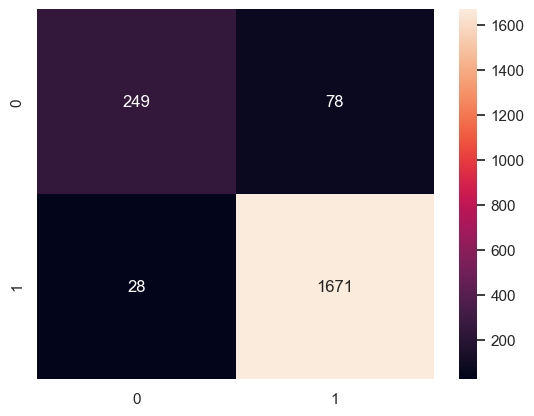

In [99]:
cm = confusion_matrix (y_test,y_rand_gbr)
sns.heatmap(cm, annot = True, fmt='d')

In [100]:
print(classification_report(y_test,y_rand_gbr))

                   precision    recall  f1-score   support

Attrited Customer       0.90      0.76      0.82       327
Existing Customer       0.96      0.98      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.93      0.87      0.90      2026
     weighted avg       0.95      0.95      0.95      2026



In [101]:
### Logistic regression

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
num_df_x = X_train.select_dtypes(include=['int64','float64'])
vif_data = pd.DataFrame() 
vif_data["feature"] = num_df_x.columns 

vif_data["VIF"] = [variance_inflation_factor(num_df_x.values, i) 
                          for i in range(len(num_df_x.columns))] 
  
print(vif_data)

                     feature        VIF
0               Customer_Age  18.824391
1            Dependent_count   3.985750
2   Total_Relationship_Count   7.237631
3     Months_Inactive_12_mon   6.016133
4      Contacts_Count_12_mon   5.616174
5               Credit_Limit   3.346372
6        Total_Revolving_Bal   6.703497
7       Total_Amt_Chng_Q4_Q1  13.993791
8            Total_Trans_Amt   2.986701
9        Total_Ct_Chng_Q4_Q1  11.385777
10     Avg_Utilization_Ratio   5.629042


In [103]:
X_train_lg = X_train.drop(['Customer_Age','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'],axis=1)

num_df_x_lg = X_train_lg.select_dtypes(include=['int64','float64'])

vif_data = pd.DataFrame() 
vif_data["feature"] = num_df_x_lg.columns 

vif_data["VIF"] = [variance_inflation_factor(num_df_x_lg.values, i) 
                          for i in range(len(num_df_x_lg.columns))] 
  
print(vif_data)

                    feature       VIF
0           Dependent_count  3.782311
1  Total_Relationship_Count  5.494647
2    Months_Inactive_12_mon  5.167728
3     Contacts_Count_12_mon  4.917121
4              Credit_Limit  3.264787
5       Total_Revolving_Bal  6.681296
6           Total_Trans_Amt  2.563013
7     Avg_Utilization_Ratio  5.508292


In [104]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train_lg, y_train)

LogisticRegression()

In [105]:
X_test_lg = X_test.drop(['Customer_Age','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'],axis=1)

y_pred_lg = lg.predict(X_test_lg)

<Axes: >

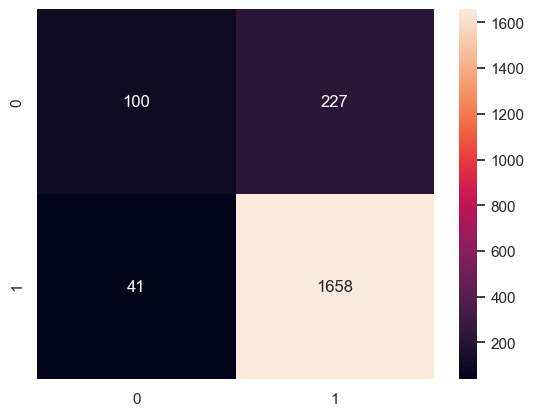

In [106]:
cm = confusion_matrix (y_test,y_pred_lg)
sns.heatmap(cm, annot = True, fmt='d')

In [107]:
print(classification_report(y_test,y_pred_lg))

                   precision    recall  f1-score   support

Attrited Customer       0.71      0.31      0.43       327
Existing Customer       0.88      0.98      0.93      1699

         accuracy                           0.87      2026
        macro avg       0.79      0.64      0.68      2026
     weighted avg       0.85      0.87      0.84      2026



####  Balanced data

In [108]:
### smote

from imblearn.over_sampling import RandomOverSampler

#counter = Counter(y_train)
#print('Before',counter)
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_train_smtom,y_train_smtom = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smtom))

Original dataset shape Counter({'Existing Customer': 6801, 'Attrited Customer': 1300})
Resample dataset shape Counter({'Existing Customer': 6801, 'Attrited Customer': 6801})


<Axes: >

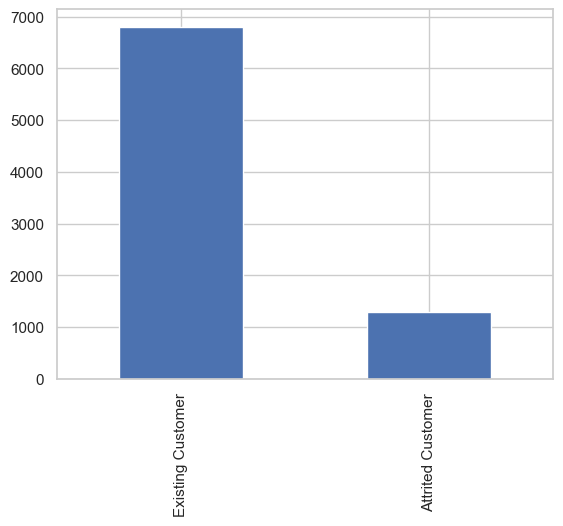

In [109]:
### Imbalanced barplot

y_train.value_counts().plot(kind='bar')

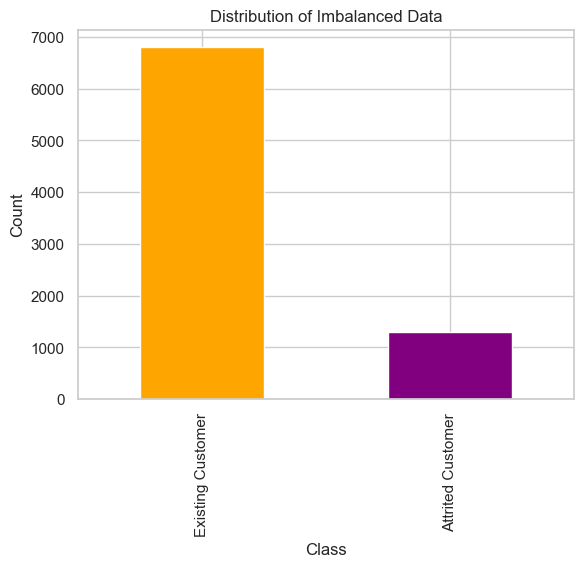

In [112]:
import matplotlib.pyplot as plt
class_counts = y_train.value_counts()
class_counts.plot(kind='bar', color=['orange', 'purple'])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Imbalanced Data')
plt.show()

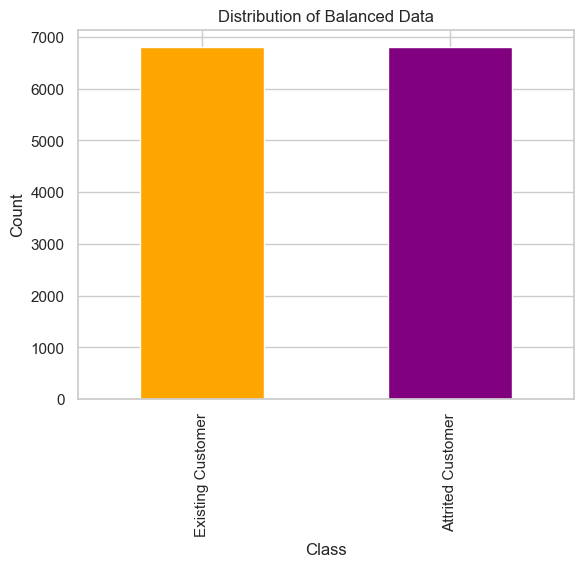

In [114]:
import matplotlib.pyplot as plt
class_counts = y_train_smtom.value_counts()
class_counts.plot(kind='bar', color=['orange', 'purple'])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Balanced Data')
plt.show()

In [109]:
###  decision classifier

from sklearn.tree import DecisionTreeClassifier

dtc_bal = DecisionTreeClassifier(criterion='gini',max_depth=100)

dtc_bal.fit(X_train_smtom,y_train_smtom)

DecisionTreeClassifier(max_depth=100)

<Axes: >

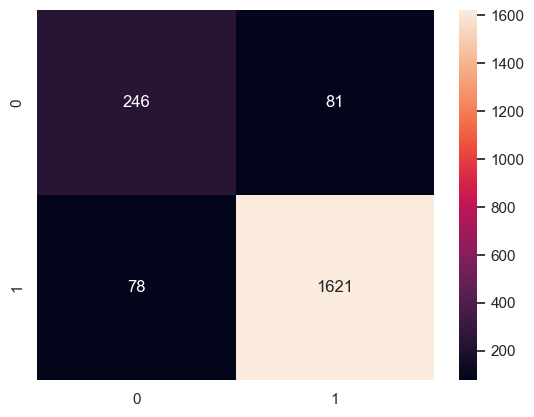

In [110]:
y_pred_dtc_bal = dtc_bal.predict(X_test)

cm = confusion_matrix (y_test,y_pred_dtc_bal)
sns.heatmap(cm, annot = True, fmt='d')

In [111]:
print(classification_report(y_test,y_pred_dtc_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.75      0.76       327
Existing Customer       0.95      0.95      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.86      0.85      0.85      2026
     weighted avg       0.92      0.92      0.92      2026



In [112]:
### Hyperparameter tuning for Decision tree
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param = {
        'max_depth' :randint(1,100),
        'criterion':['gini','entropy']
        }
        #'max_features' : [3,4,5]}
         #'max_features' : ['auto','sqrt','log2',None]}

dtc_rand = DecisionTreeClassifier()

#try all possible combination from param set

rand_search_dtc_bal = RandomizedSearchCV(dtc_rand,param_distributions=param,n_iter=5,cv=5)

rand_search_dtc_bal.fit(X_train_smtom,y_train_smtom)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D096D5FDC0>})

In [113]:
y_rand_dtc_bal = rand_search_dtc_bal.predict(X_test)

In [114]:
print(classification_report(y_test,y_rand_dtc_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.75      0.76       327
Existing Customer       0.95      0.96      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.86      0.85      0.85      2026
     weighted avg       0.92      0.92      0.92      2026



In [115]:
### Baggig classifier

In [116]:
bag_bal = BaggingClassifier(oob_score=True, n_estimators=500, random_state=300, base_estimator = DecisionTreeClassifier())

bag_bal.fit(X_train_smtom,y_train_smtom)

y_bag_bal = bag_bal.predict(X_test)

C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<Axes: >

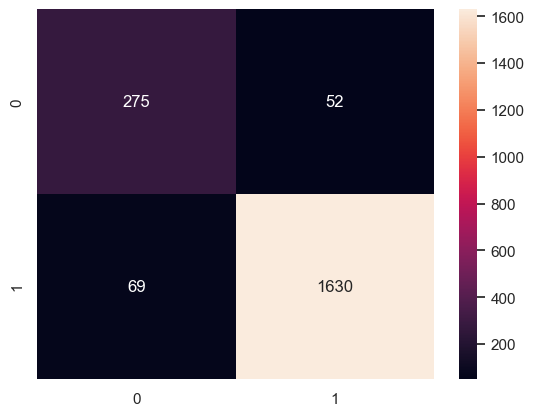

In [117]:
cm_bag = confusion_matrix (y_test,y_bag_bal)
sns.heatmap(cm_bag, annot = True, fmt='d')

In [118]:
print(classification_report(y_test,y_bag_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.84      0.82       327
Existing Customer       0.97      0.96      0.96      1699

         accuracy                           0.94      2026
        macro avg       0.88      0.90      0.89      2026
     weighted avg       0.94      0.94      0.94      2026



In [119]:
#### Random forest classifier

In [120]:
rfc_bal = RandomForestClassifier(oob_score = True,n_estimators=500, max_depth=8,random_state=42)

rfc_bal.fit(X_train_smtom,y_train_smtom)

y_rfc_bal = rfc_bal.predict(X_test)


<Axes: >

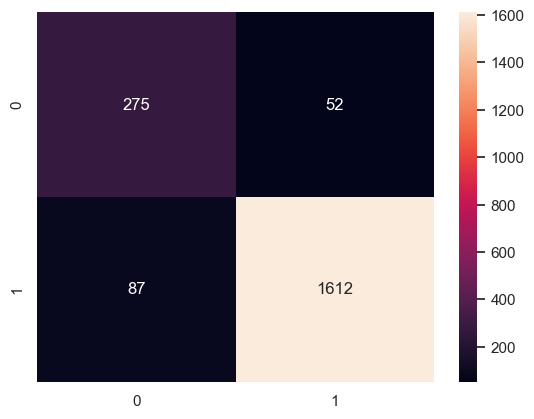

In [122]:
cm_rfc = confusion_matrix (y_test,y_rfc_bal)
sns.heatmap(cm_rfc, annot = True, fmt='d')

In [123]:
print(classification_report(y_test,y_rfc_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.84      0.80       327
Existing Customer       0.97      0.95      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.86      0.89      0.88      2026
     weighted avg       0.94      0.93      0.93      2026



In [124]:
from scipy.stats import randint

param = {'n_estimators' : randint(50,500),
        'max_depth' : randint(1,50),
        'criterion': ['gini','entropy'],
        #'max_features' : [3,4,5]}
         'max_features' : ['auto','sqrt','log2',None]}

rf = RandomForestClassifier()

#try all possible combination from param set

rand_search_rfc_bal = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,cv=5,random_state=42)

rand_search_rfc_bal.fit(X_train_smtom,y_train_smtom)

C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chetan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D09B7CAB90>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D097AB75B0>},
                   random_state=42)

In [125]:
print("Best parameters:", rand_search_rfc_bal.best_params_)

y_rand_rfc_bal = rand_search_rfc_bal.predict(X_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 21, 'max_features': 'log2', 'n_estimators': 171}


In [126]:
print(classification_report(y_test,y_rand_rfc_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.85      0.73      0.79       327
Existing Customer       0.95      0.98      0.96      1699

         accuracy                           0.94      2026
        macro avg       0.90      0.85      0.88      2026
     weighted avg       0.93      0.94      0.93      2026



In [127]:
#### Gradient boosting

In [128]:
gb_bal = GradientBoostingClassifier()
gb_bal.fit(X_train_smtom,y_train_smtom)

GradientBoostingClassifier()

<Axes: >

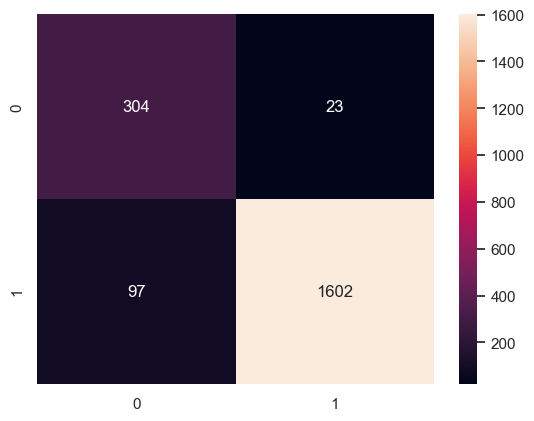

In [129]:
y_gb_bal = gb_bal.predict(X_test)

cm = confusion_matrix (y_test,y_gb_bal)
sns.heatmap(cm, annot = True, fmt='d')

In [130]:
print(classification_report(y_test,y_gb_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.93      0.84       327
Existing Customer       0.99      0.94      0.96      1699

         accuracy                           0.94      2026
        macro avg       0.87      0.94      0.90      2026
     weighted avg       0.95      0.94      0.94      2026



In [131]:
param = {'n_estimators' : range(20,81,10),
        'max_depth' :randint(1,20),
         'max_depth':range(5,16,2), 
         'min_samples_split':range(200,1001,200),
         #'learning_rate': [1.5]
        #'criterion':['gini','entropy']
         'max_features' : ['sqrt','log2']
        }
        #'max_features' : [3,4,5]}
         

gbr_bal = GradientBoostingClassifier(learning_rate=0.1, random_state=42)

#try all possible combination from param set

rand_search_gbr_bal = RandomizedSearchCV(gbr_bal,param_distributions=param,n_iter=5,cv=5)

rand_search_gbr_bal.fit(X_train_smtom,y_train_smtom)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': range(200, 1001, 200),
                                        'n_estimators': range(20, 81, 10)})

<Axes: >

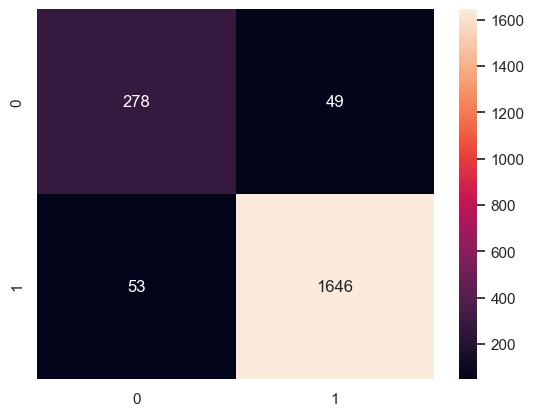

In [132]:
y_rand_gbr_bal = rand_search_gbr_bal.predict(X_test)

cm = confusion_matrix (y_test,y_rand_gbr_bal)
sns.heatmap(cm, annot = True, fmt='d')

In [133]:
print(classification_report(y_test,y_rand_gbr_bal))

                   precision    recall  f1-score   support

Attrited Customer       0.84      0.85      0.84       327
Existing Customer       0.97      0.97      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.91      0.91      0.91      2026
     weighted avg       0.95      0.95      0.95      2026



In [134]:
### Logistic Regression

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
num_df_x = X_train_smtom.select_dtypes(include=['int64','float64'])
vif_data = pd.DataFrame() 
vif_data["feature"] = num_df_x.columns 

vif_data["VIF"] = [variance_inflation_factor(num_df_x.values, i) 
                          for i in range(len(num_df_x.columns))] 
  
print(vif_data)

                     feature        VIF
0               Customer_Age  19.655286
1            Dependent_count   4.054572
2   Total_Relationship_Count   6.086061
3     Months_Inactive_12_mon   7.182506
4      Contacts_Count_12_mon   6.170083
5               Credit_Limit   2.859972
6        Total_Revolving_Bal   5.550730
7       Total_Amt_Chng_Q4_Q1  13.406651
8            Total_Trans_Amt   3.030128
9        Total_Ct_Chng_Q4_Q1   9.618729
10     Avg_Utilization_Ratio   4.933712


In [136]:
X_train_smtom_lg = X_train_smtom.drop(['Customer_Age','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'],axis=1)

num_df_x_lg = X_train_smtom_lg.select_dtypes(include=['int64','float64'])

vif_data = pd.DataFrame() 
vif_data["feature"] = num_df_x_lg.columns 

vif_data["VIF"] = [variance_inflation_factor(num_df_x_lg.values, i) 
                          for i in range(len(num_df_x_lg.columns))] 
  
print(vif_data)

                    feature       VIF
0           Dependent_count  3.884590
1  Total_Relationship_Count  4.893224
2    Months_Inactive_12_mon  5.550642
3     Contacts_Count_12_mon  5.250963
4              Credit_Limit  2.798014
5       Total_Revolving_Bal  5.541692
6           Total_Trans_Amt  2.495397
7     Avg_Utilization_Ratio  4.844660


In [137]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train_smtom_lg, y_train_smtom)

LogisticRegression()

<Axes: >

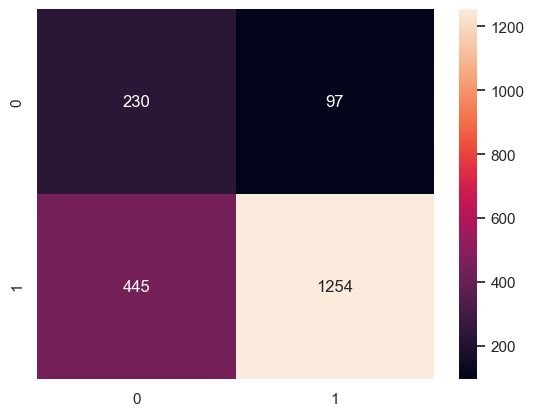

In [138]:
X_test_lg = X_test.drop(['Customer_Age','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'],axis=1)

y_pred_lg = lg.predict(X_test_lg)

cm = confusion_matrix (y_test,y_pred_lg)
sns.heatmap(cm, annot = True, fmt='d')

In [139]:
print(classification_report(y_test,y_pred_lg))

                   precision    recall  f1-score   support

Attrited Customer       0.34      0.70      0.46       327
Existing Customer       0.93      0.74      0.82      1699

         accuracy                           0.73      2026
        macro avg       0.63      0.72      0.64      2026
     weighted avg       0.83      0.73      0.76      2026

